In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import stan

try:
    import arviz as az
except ImportError as err:
    print("Please, install arviz for easy visualization of Stan models.")

import nest_asyncio
nest_asyncio.apply()

### Normal-Normal
As a simple case of this distribution, we will model the expected number of berries on a branch. We predict initially an average of 15 berries with a standard deviation of 3.

Prior:
$p(\mu) = N(\mu | \mu_0, \sigma_0)$,
where 
$\mu_0 = 15, \sigma_0 = 3$

Likelihood:
$p(y | \mu, \sigma^2) = N(y | \mu, \sigma^2)$

<Axes: ylabel='Count'>

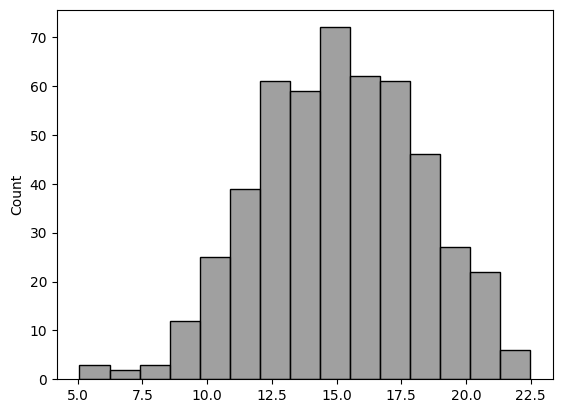

In [40]:
### Simulate data
mu_0 = 15
sigma_0 = 3
sigma_2 = 9
N = 500
pre_mu = np.random.normal(mu_0, sigma_0, size=N)
y = np.random.normal(pre_mu, sigma_2)

# example of prior distribution
sns.histplot(pre_mu, color='gray')

In [41]:
### Create data dictionary
data_dict = {
    'y': y,
    'N': N
}

In [42]:
program_code = """

data {
    int<lower=1> N;
    vector[N] y;
}

parameters {
    real mu;
}

model {
    // Priors
    mu ~ normal(5, 3);          // mu_0 = 0, sigma_0 = 3

    // Data model (likelihood)
    for (n in 1:N) {
        y[n] ~ normal(mu, 9);   // sigma_2 = 9
    }
}

"""

In [43]:
model = stan.build(program_code, data=data_dict)

Building...



Building: found in cache, done.

In [44]:
fit = model.sample(num_chains=4, num_samples=1000, num_warmup=500)

Sampling:   0%
Sampling:  25% (1500/6000)
Sampling:  50% (3000/6000)
Sampling:  75% (4500/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.00012 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000129 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000137 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000124 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.24 seconds.
  Adjust your expectations accordingly!


In [45]:
### Explore raw model outouts
results_df = fit.to_frame()

az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,14.383,0.397,13.67,15.158,0.01,0.007,1503.0,1985.0,1.0


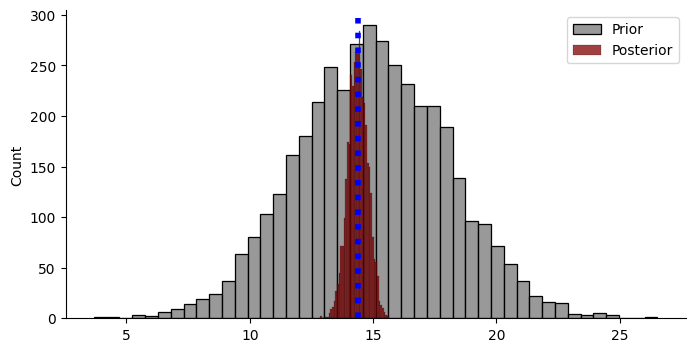

In [46]:
# plot prior vs posterior
prior_samples = np.random.normal(mu_0, sigma_0, size=4000)
post_samples = results_df.mu.values
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(prior_samples, color='gray', ax=ax, alpha=0.8, label="Prior")
sns.histplot(post_samples, color='maroon', ax=ax, label="Posterior")
ax.axvline(np.mean(post_samples), color='blue', linestyle='dotted', lw=4)
sns.despine()
ax.legend()